#### Setup

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [52]:
# Loading Dataset
data = pd.read_csv('Zomato data .csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [56]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [58]:
data.duplicated().sum()

0

##### No null values, no duplicates
##### Let us convert Yes/no fields to 0/1

In [61]:
data['online_order'] = data['online_order'].astype(str).apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
data['book_table'] = data['book_table'].astype(str).apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

In [63]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1/5,775,800,Buffet
1,Spice Elephant,1,0,4.1/5,787,800,Buffet
2,San Churro Cafe,1,0,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,300,Buffet
4,Grand Village,0,0,3.8/5,166,600,Buffet


In [65]:
# Renaming column for convenience
data.rename(columns={'approx_cost(for two people)': 'approx_cost', 'listed_in(type)': 'restaurant_type'}, inplace=True)

In [67]:
data.rename(columns={'rate': 'rating'}, inplace = True)

In [69]:
# Simplify Rating Column
def simplifyRating(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rating']=data['rating'].apply(simplifyRating)

In [71]:
data.head()

,name,online_order,book_table,rating,votes,approx_cost,restaurant_type
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


# Restaurants with online ordering: 58 (39.19%)
# Restaurants offering table booking: 8 (5.41%)


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/2691201308.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="viridis")


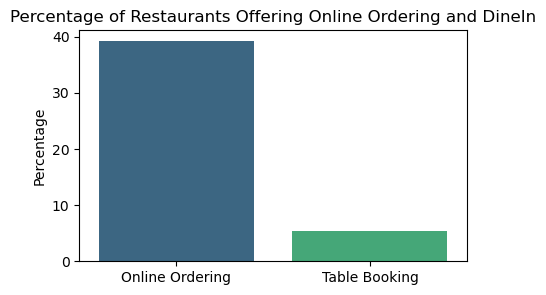

In [93]:
# Online Order Count
online_order_count = data['online_order'].sum()
online_order_percentage = (online_order_count / len(data))*100

print(f"# Restaurants with online ordering: {online_order_count} ({online_order_percentage:.2f}%)")

# Dine In Count
tableBooking_count = data['book_table'].sum()
tableBooking_percentage = (tableBooking_count / len(data))*100

print(f"# Restaurants offering table booking: {tableBooking_count} ({tableBooking_percentage:.2f}%)")

plt.figure(figsize=(5, 3))
labels = ['Online Ordering', 'Table Booking']
values = [online_order_percentage, tableBooking_percentage]
sns.barplot(x=labels, y=values, palette="viridis")
plt.title("Percentage of Restaurants Offering Online Ordering and DineIn")
plt.ylabel("Percentage")
plt.show()

Most Common Restaurant Types:
restaurant_type
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


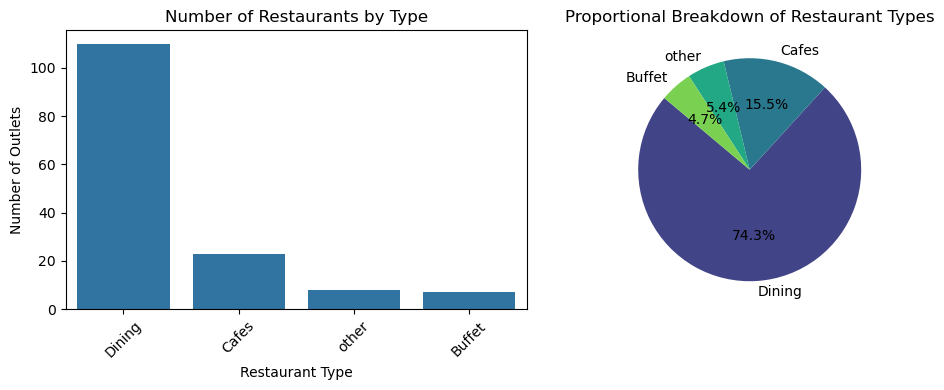

In [106]:
# Count the number of restaurants by type
restaurant_type_counts = data['restaurant_type'].value_counts()

# Print the most common restaurant types
print("Most Common Restaurant Types:")
print(restaurant_type_counts)

# Set up a figure to display bar and pie charts side by side
plt.figure(figsize=(10, 4))

# Bar Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=restaurant_type_counts.index, y=restaurant_type_counts.values)
plt.title("Number of Restaurants by Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(restaurant_type_counts.values, labels=restaurant_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(restaurant_type_counts)))
plt.title("Proportional Breakdown of Restaurant Types")

# Display the charts
plt.tight_layout()
plt.show()

restaurant_type  total_count  online_order_count  table_booking_count  online_order_percentage  table_booking_percentage
         Buffet            7                   4                    1                57.142857                 14.285714
          Cafes           23                  15                    3                65.217391                 13.043478
         Dining          110                  33                    2                30.000000                  1.818182
          other            8                   6                    2                75.000000                 25.000000


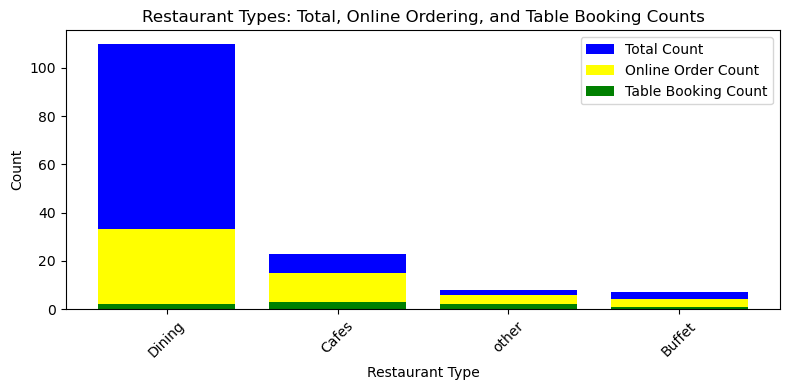

In [118]:
# Step 1: Create a Summary Table
summary = data.groupby('restaurant_type').agg(
    total_count=('name', 'count'),
    online_order_count=('online_order', 'sum'),
    table_booking_count=('book_table', 'sum')
).reset_index()

# Add percentage columns
summary['online_order_percentage'] = (summary['online_order_count'] / summary['total_count']) * 100
summary['table_booking_percentage'] = (summary['table_booking_count'] / summary['total_count']) * 100

# Display the summary table
print(summary.to_string(index=False))

# Step 2: Stacked Bar Chart
# Prepare data for the stacked bar chart
summary_sorted = summary.sort_values(by='total_count', ascending=False)  # Sort by total count for better visualization

# Plot stacked bar chart
plt.figure(figsize=(8, 4))
bar1 = plt.bar(summary_sorted['restaurant_type'], summary_sorted['total_count'], label='Total Count', color='blue')
bar2 = plt.bar(summary_sorted['restaurant_type'], summary_sorted['online_order_count'], label='Online Order Count', color='yellow')
bar3 = plt.bar(summary_sorted['restaurant_type'], summary_sorted['table_booking_count'], label='Table Booking Count', color='green')

# Add chart details
plt.title("Restaurant Types: Total, Online Ordering, and Table Booking Counts")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

Overall Average Cost for Two People: 418.24

Cost Summary Table:
restaurant_type  Number of Restaurants  Average Cost
         Buffet                      7    671.428571
          Cafes                     23    545.652174
         Dining                    110    357.272727
          other                      8    668.750000


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/628778806.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_summary['restaurant_type'], y=cost_summary['Average Cost'], palette="viridis")


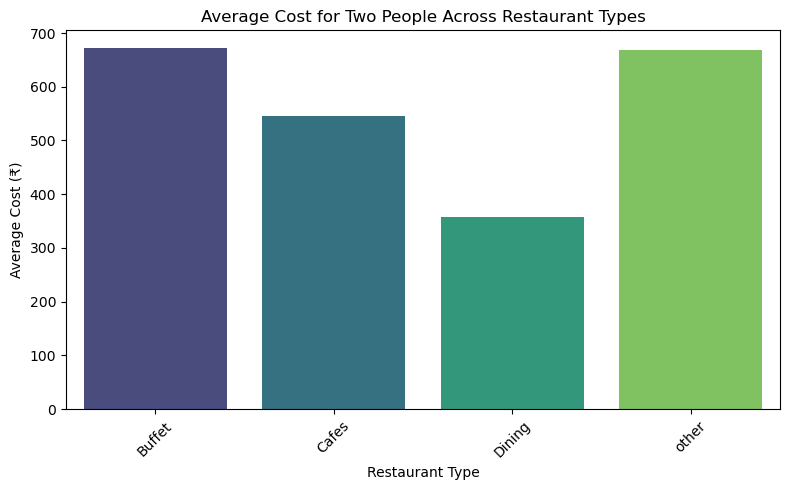

In [126]:
# Step 1: Calculate Overall and Type-Wise Approx Costs
# Overall Average Cost
overall_avg_cost = data['approx_cost'].mean()
print(f"Overall Average Cost for Two People: {overall_avg_cost:.2f}")

# Restaurant Type-Wise Statistics
cost_summary = data.groupby('restaurant_type').agg(
    num_restaurants=('name', 'count'),
    avg_cost=('approx_cost', 'mean')
).reset_index()

# Rename columns for clarity
cost_summary.rename(columns={'num_restaurants': 'Number of Restaurants', 'avg_cost': 'Average Cost'}, inplace=True)

# Display the table
print("\nCost Summary Table:")
print(cost_summary.to_string(index=False))

# Step 2: Visualize the Data with a Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cost_summary['restaurant_type'], y=cost_summary['Average Cost'], palette="viridis")
plt.title("Average Cost for Two People Across Restaurant Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Cost (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall Average Rating Across All Restaurants: 3.63

Rating Summary Table:
restaurant_type  Average Rating  Number of Restaurants
         Buffet        3.842857                      7
          Cafes        3.765217                     23
         Dining        3.571818                    110
          other        3.912500                      8


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/453441419.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_summary['restaurant_type'], y=rating_summary['Average Rating'], palette="viridis")


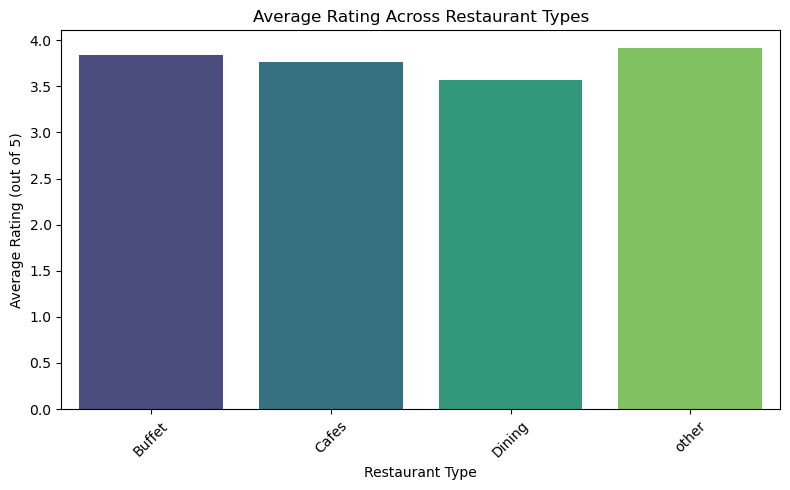

In [130]:
# Step 1: Calculate Overall Average Rating
overall_avg_rating = data['rating'].mean()
print(f"Overall Average Rating Across All Restaurants: {overall_avg_rating:.2f}")

# Step 2: Calculate Average Rating by Restaurant Type
rating_summary = data.groupby('restaurant_type').agg(
    avg_rating=('rating', 'mean'),
    num_restaurants=('name', 'count')
).reset_index()

# Rename columns for clarity
rating_summary.rename(columns={'avg_rating': 'Average Rating', 'num_restaurants': 'Number of Restaurants'}, inplace=True)

# Display the table
print("\nRating Summary Table:")
print(rating_summary.to_string(index=False))

# Step 3: Visualize the Data with a Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_summary['restaurant_type'], y=rating_summary['Average Rating'], palette="viridis")
plt.title("Average Rating Across Restaurant Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating (out of 5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
# Step 1: Calculate Overall and Type-Wise Average Ratings
# Overall Average Rating
overall_avg_rating = data['rating'].mean()
print(f"Overall Average Rating: {overall_avg_rating:.2f}")

# Restaurant Type-Wise Average Ratings
rating_summary = data.groupby('restaurant_type').agg(
    avg_rating=('rating', 'mean'),
    num_restaurants=('name', 'count')
).reset_index()

# Rename columns for clarity
rating_summary.rename(columns={'avg_rating': 'Average Rating', 'num_restaurants': 'Number of Restaurants'}, inplace=True)

# Display the summary table
print("\nRating Summary Table:")
print(rating_summary.to_string(index=False))

Overall Average Rating: 3.63

Rating Summary Table:
restaurant_type  Average Rating  Number of Restaurants
         Buffet        3.842857                      7
          Cafes        3.765217                     23
         Dining        3.571818                    110
          other        3.912500                      8


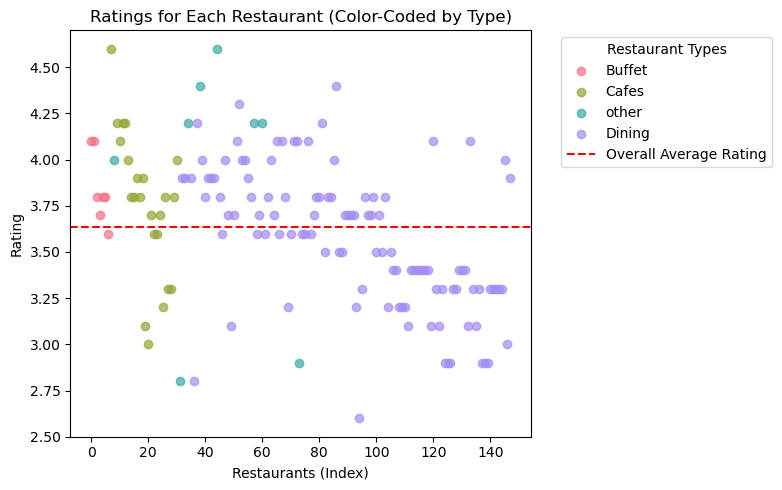

In [146]:
# Import a color palette
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

# Step 1: Assign Colors to Restaurant Types
restaurant_types = data['restaurant_type'].unique()  # Get unique restaurant types
colors = sns.color_palette("husl", len(restaurant_types))  # Generate a color for each type
color_map = dict(zip(restaurant_types, colors))  # Map restaurant types to colors

# Step 2: Scatter Plot with Color Coding
plt.figure(figsize=(8, 5))

# Plot each restaurant type with its respective color
for restaurant_type in restaurant_types:
    subset = data[data['restaurant_type'] == restaurant_type]
    plt.scatter(
        subset.index, 
        subset['rating'], 
        label=restaurant_type, 
        color=color_map[restaurant_type], 
        alpha=0.7
    )

# Add overall average rating as a horizontal line
plt.axhline(y=overall_avg_rating, color='red', linestyle='--', label='Overall Average Rating')

# Add chart details
plt.title("Ratings for Each Restaurant (Color-Coded by Type)")
plt.xlabel("Restaurants (Index)")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Restaurant Types")
plt.tight_layout()
plt.show()

In [148]:
data.head()

,name,online_order,book_table,rating,votes,approx_cost,restaurant_type
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet



Votes Summary Table:
restaurant_type  Total Votes  Average Votes
         Buffet         3028     432.571429
          Cafes         6434     279.739130
         Dining        20363     185.118182
          other         9367    1170.875000


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/3164576999.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=votes_summary['restaurant_type'], y=votes_summary['Total Votes'], palette="viridis")
/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/3164576999.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=votes_summary['restaurant_type'], y=votes_summary['Average Votes'], palette="magma")


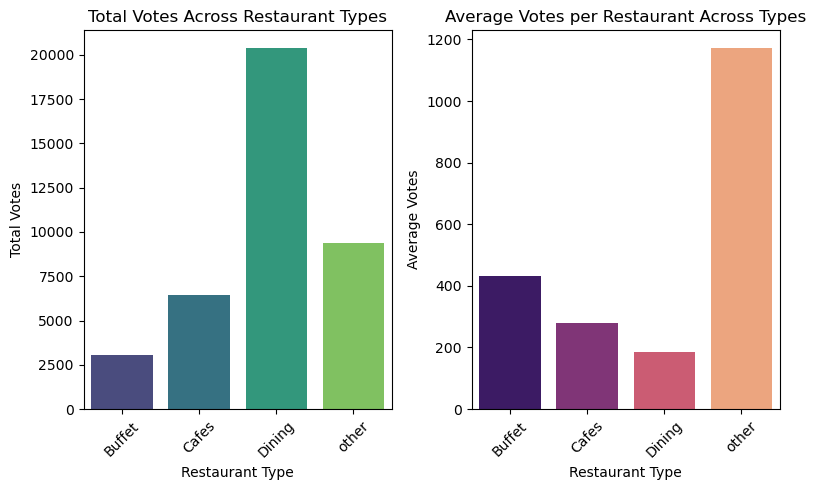

In [154]:
# Step 1: Calculate Total and Average Votes by Restaurant Type
votes_summary = data.groupby('restaurant_type').agg(
    total_votes=('votes', 'sum'),
    avg_votes=('votes', 'mean')
).reset_index()

# Rename columns for clarity
votes_summary.rename(columns={'total_votes': 'Total Votes', 'avg_votes': 'Average Votes'}, inplace=True)

# Display the summary table
print("\nVotes Summary Table:")
print(votes_summary.to_string(index=False))

# Step 2: Create Bar Charts Side by Side
plt.figure(figsize=(8, 5))

# First Bar Chart: Total Votes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=votes_summary['restaurant_type'], y=votes_summary['Total Votes'], palette="viridis")
plt.title("Total Votes Across Restaurant Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)

# Second Bar Chart: Average Votes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=votes_summary['restaurant_type'], y=votes_summary['Average Votes'], palette="magma")
plt.title("Average Votes per Restaurant Across Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Votes")
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Hypothesis:
##### Null Hypothesis: Online ordering availability does not influence restaurant ratings.
##### Alternative Hypothesis: Online ordering availability influences restaurant ratings.
#### Statistical Test:
##### Use a two-sample t-test to check if there’s a significant difference in the average ratings of restaurants that offer online ordering and those that don’t.
##### Calculate the correlation between online_order and rating (if appropriate).
#### Visualization:
##### Create a boxplot to visualize the rating distributions for restaurants with and without online ordering.

T-Statistic: 6.01
P-Value: 0.0000
Correlation between Ratings and Online Ordering: 0.45


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/86716374.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['online_order'], y=data['rating'], palette="viridis")


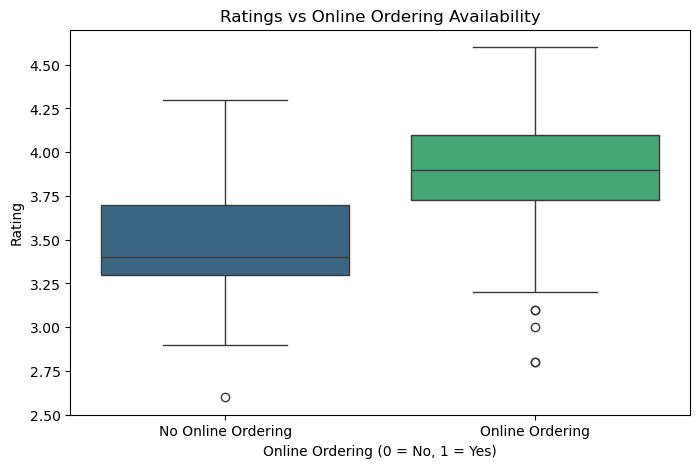

In [166]:
from scipy.stats import ttest_ind

# Separate Ratings by Online Ordering Availability
ratings_online = data[data['online_order'] == 1]['rating']
ratings_no_online = data[data['online_order'] == 0]['rating']

# Two-Sample T-Test
t_stat, p_value = ttest_ind(ratings_online, ratings_no_online, equal_var=False)

# T-Test Results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Calculate Correlation
correlation = data[['rating', 'online_order']].corr().iloc[0, 1]
print(f"Correlation between Ratings and Online Ordering: {correlation:.2f}")

# Visualization
plt.figure(figsize=(8, 5))

# Boxplot for Rating Distributions
sns.boxplot(x=data['online_order'], y=data['rating'], palette="viridis")
plt.title("Ratings vs Online Ordering Availability")
plt.xlabel("Online Ordering (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.xticks(ticks=[0, 1], labels=["No Online Ordering", "Online Ordering"])
plt.show()

##### No of votes vs Online Order 

T-Statistics: 3.83
P-Value: 0.0003
Correlation between Votes and Online Ordering: 0.36


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/3656554747.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['online_order'], y=data['votes'], palette="viridis", hue=None)


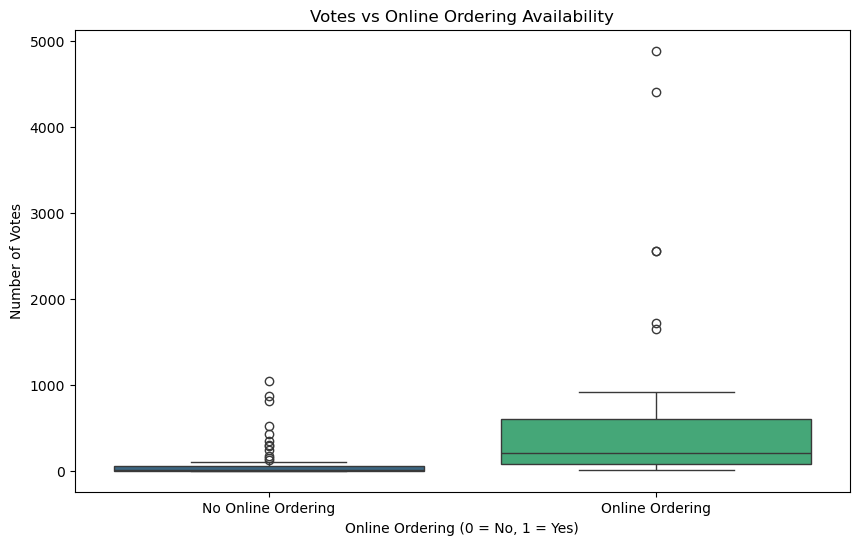

In [173]:
from scipy.stats import ttest_ind

# Separate Votes by Online Ordering Availability

votes_online = data[data['online_order'] == 1]['votes']
votes_no_online = data[data['online_order'] == 0]['votes']

# Perform Two-Sample T-Test

t_stat_votes, p_value_votes = ttest_ind(votes_online, votes_no_online, equal_var=False)

# Print T-Test Results

print(f"T-Statistics: {t_stat_votes:.2f}")
print(f"P-Value: {p_value_votes:.4f}")

# Calculate Correlation

correlation_votes = data[['votes', 'online_order']].corr().iloc[0,1]
print(f"Correlation between Votes and Online Ordering: {correlation_votes:.2f}")

# Visualization
plt.figure(figsize=(10,6))

# Boxplot for Vote Distributions

sns.boxplot(x=data['online_order'], y=data['votes'], palette="viridis", hue=None)
plt.title("Votes vs Online Ordering Availability")
plt.xlabel("Online Ordering (0 = No, 1 = Yes)")
plt.ylabel("Number of Votes")
plt.xticks(ticks=[0, 1], labels=["No Online Ordering", "Online Ordering"])
plt.show()

#####  booking table and customer ratings

T-Statistic: 4.94
P-Value: 0.0011
Correlation between Ratings and Table Booking: 0.33


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/3898731180.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['book_table'], y=data['rating'], palette="viridis")


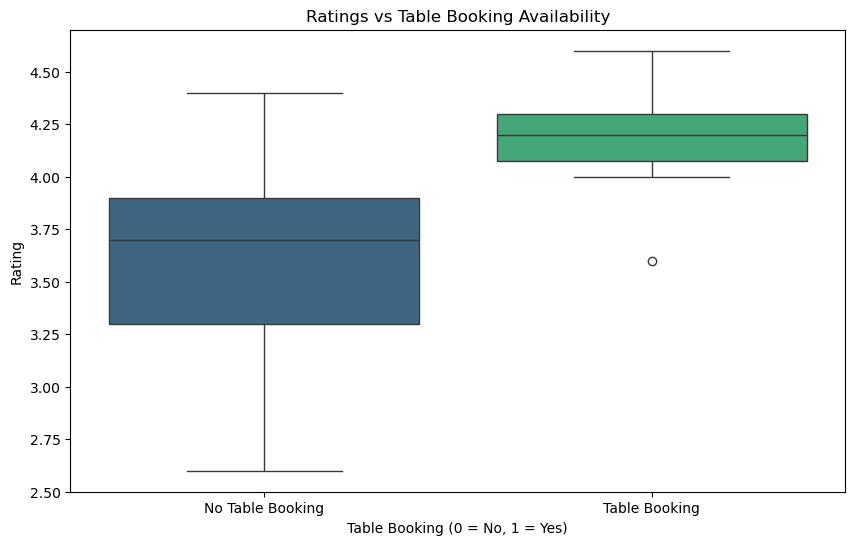

In [176]:
from scipy.stats import ttest_ind

# Separate Ratings by Table Booking Availability
ratings_table_booking = data[data['book_table'] == 1]['rating']
ratings_no_table_booking = data[data['book_table'] == 0]['rating']

# Perform Two-Sample T-Test
t_stat_table, p_value_table = ttest_ind(ratings_table_booking, ratings_no_table_booking, equal_var=False)

# Print T-Test Results
print(f"T-Statistic: {t_stat_table:.2f}")
print(f"P-Value: {p_value_table:.4f}")

# Step 3: Calculate Correlation
correlation_table = data[['rating', 'book_table']].corr().iloc[0, 1]
print(f"Correlation between Ratings and Table Booking: {correlation_table:.2f}")

# Visualization
plt.figure(figsize=(10, 6))

# Boxplot for Rating Distributions
sns.boxplot(x=data['book_table'], y=data['rating'], palette="viridis")
plt.title("Ratings vs Table Booking Availability")
plt.xlabel("Table Booking (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.xticks(ticks=[0, 1], labels=["No Table Booking", "Table Booking"])
plt.show()

##### booking table vs votes

T-Statistic: 1.94
P-Value: 0.0918
Correlation between Votes and Table Booking: 0.25


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/869083617.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['book_table'], y=data['votes'], palette="viridis")


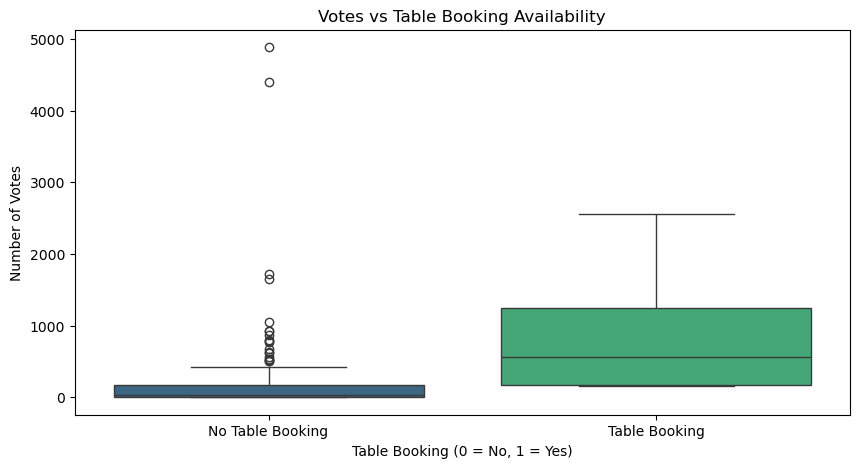

In [179]:
from scipy.stats import ttest_ind

# Separate Votes by Table Booking Availability
votes_table_booking = data[data['book_table'] == 1]['votes']
votes_no_table_booking = data[data['book_table'] == 0]['votes']

# Perform Two-Sample T-Test
t_stat_votes_table, p_value_votes_table = ttest_ind(votes_table_booking, votes_no_table_booking, equal_var=False)

# Print T-Test Results
print(f"T-Statistic: {t_stat_votes_table:.2f}")
print(f"P-Value: {p_value_votes_table:.4f}")

# Calculate Correlation
correlation_votes_table = data[['votes', 'book_table']].corr().iloc[0, 1]
print(f"Correlation between Votes and Table Booking: {correlation_votes_table:.2f}")

# Visualization
plt.figure(figsize=(10, 5))

# Boxplot for Vote Distributions
sns.boxplot(x=data['book_table'], y=data['votes'], palette="viridis")
plt.title("Votes vs Table Booking Availability")
plt.xlabel("Table Booking (0 = No, 1 = Yes)")
plt.ylabel("Number of Votes")
plt.xticks(ticks=[0, 1], labels=["No Table Booking", "Table Booking"])
plt.show()

##### Cost vs Rating & cost vs Votes

##### Since both are continuous variables, we will use perason corelation

Correlation between Cost and Rating: 0.28
P-Value: 0.0007


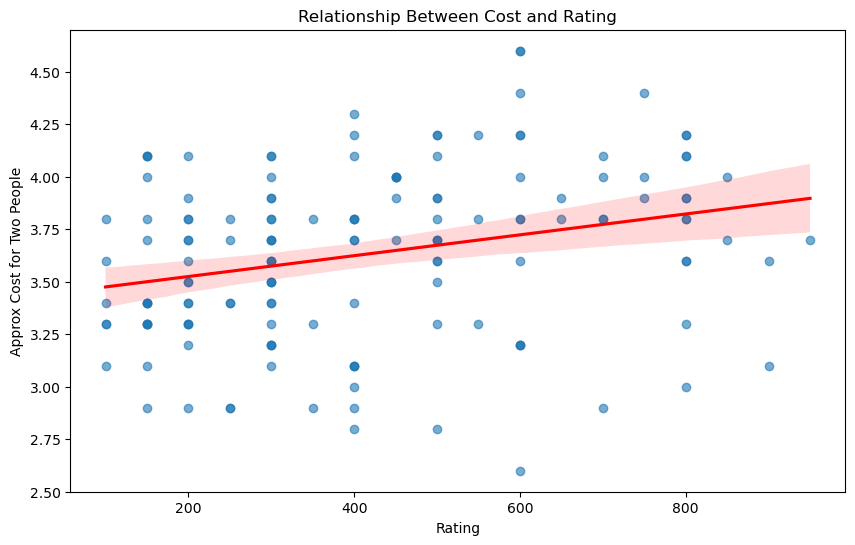

In [186]:
from scipy.stats import pearsonr

# Step 1: Calculate Correlation
correlation_cost_rating, p_value_cost_rating = pearsonr(data['approx_cost'], data['rating'])

# Print Correlation Results
print(f"Correlation between Cost and Rating: {correlation_cost_rating:.2f}")
print(f"P-Value: {p_value_cost_rating:.4f}")

# Step 2: Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(y=data['rating'], x=data['approx_cost'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Relationship Between Cost and Rating")
plt.xlabel("Rating")
plt.ylabel("Approx Cost for Two People")
plt.show()

Correlation between Cost and Votes: 0.32
P-Value: 0.0001


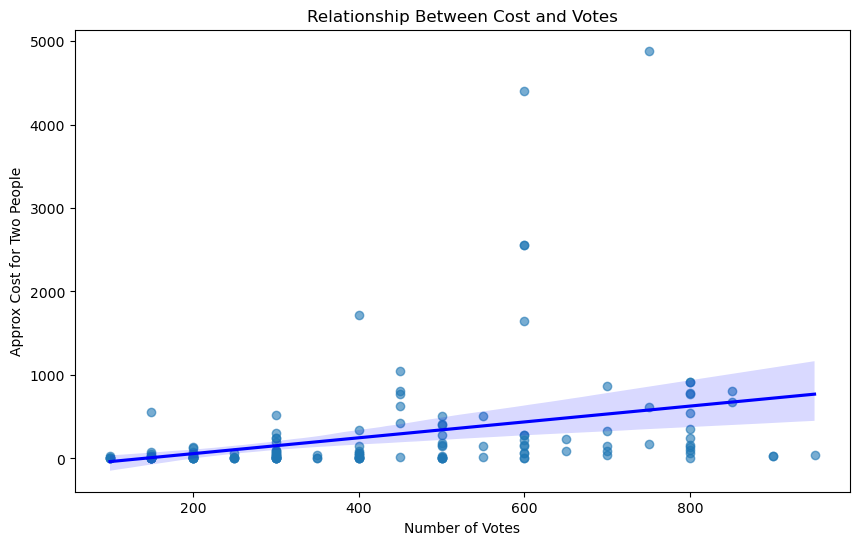

In [192]:
# Step 1: Calculate Correlation
correlation_cost_votes, p_value_cost_votes = pearsonr(data['approx_cost'], data['votes'])

# Print Correlation Results
print(f"Correlation between Cost and Votes: {correlation_cost_votes:.2f}")
print(f"P-Value: {p_value_cost_votes:.4f}")

# Step 2: Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(y=data['votes'], x=data['approx_cost'], scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title("Relationship Between Cost and Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Approx Cost for Two People")
plt.show()

##### Votes vs Rating

Correlation between Rating and Votes: 0.49
P-Value: 0.0000


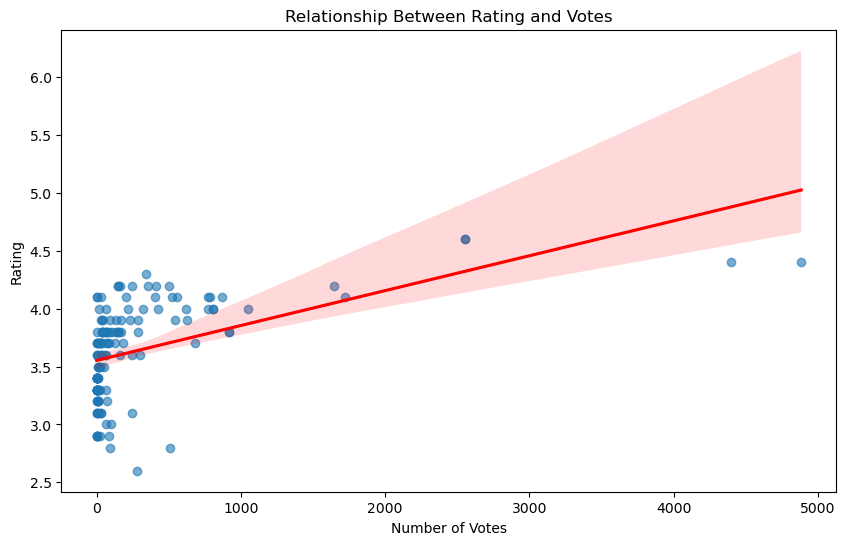

In [195]:
from scipy.stats import pearsonr

# Step 1: Calculate Correlation
correlation_rating_votes, p_value_rating_votes = pearsonr(data['rating'], data['votes'])

# Print Correlation Results
print(f"Correlation between Rating and Votes: {correlation_rating_votes:.2f}")
print(f"P-Value: {p_value_rating_votes:.4f}")

# Step 2: Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=data['votes'], y=data['rating'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Relationship Between Rating and Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()

##### Correlation Matrix

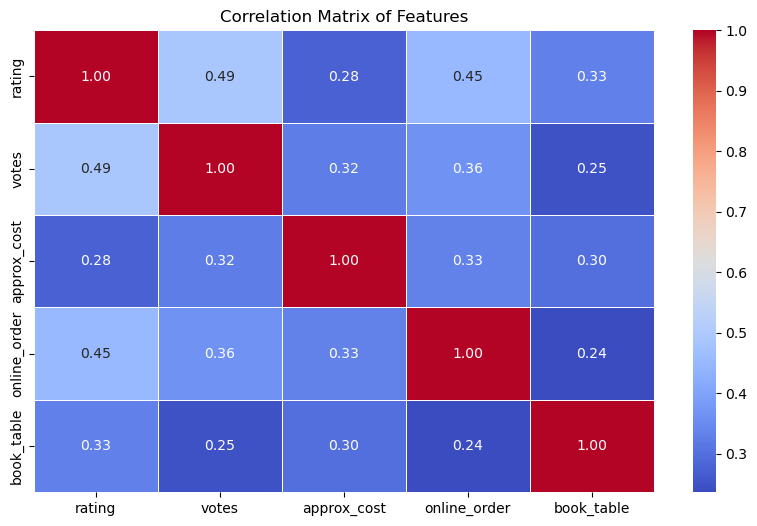

In [198]:
# Extract numeric columns
numeric_data = data[['rating', 'votes', 'approx_cost', 'online_order', 'book_table']]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare data for regression
X = data[['online_order', 'book_table', 'approx_cost']]  # Features
y_rating = data['rating']  # Target: Rating
y_votes = data['votes']  # Target: Votes

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit regression model for ratings
model_rating = LinearRegression()
model_rating.fit(X_scaled, y_rating)

# Fit regression model for votes
model_votes = LinearRegression()
model_votes.fit(X_scaled, y_votes)

# Display coefficients
print("Feature Importance for Rating:")
print(dict(zip(['online_order', 'book_table', 'approx_cost'], model_rating.coef_)))

print("\nFeature Importance for Votes:")
print(dict(zip(['online_order', 'book_table', 'approx_cost'], model_votes.coef_)))


Feature Importance for Rating:
{'online_order': 0.14879770693617614, 'book_table': 0.08692603814466567, 'approx_cost': 0.03510406926647724}

Feature Importance for Votes:
{'online_order': 173.7598394801975, 'book_table': 82.20878427121963, 'approx_cost': 129.18076936687268}


#### Which restaurant categories should Zomato prioritize for promotions or partnerships?

restaurant_type  avg_rating  total_votes  online_order_percentage  table_booking_percentage   avg_cost  num_restaurants  priority_score
         Dining    3.571818        20363                 0.300000                  0.018182 357.272727              110     4216.610636
          other    3.912500         9367                 0.750000                  0.250000 668.750000                8     2142.148750
          Cafes    3.765217         6434                 0.652174                  0.130435 545.652174               23     1506.255652
         Buffet    3.842857         3028                 0.571429                  0.142857 671.428571                7      875.381429


/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_14189/998107461.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


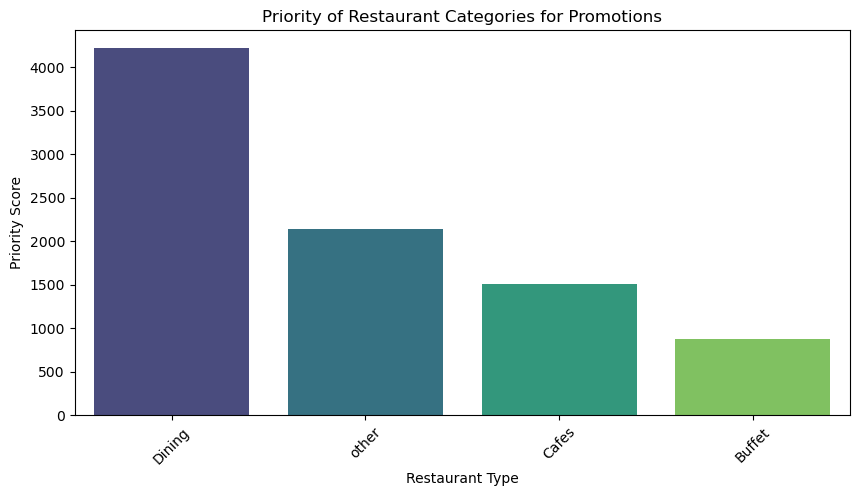

In [211]:
# Group by restaurant type and calculate key metrics
restaurant_priority = data.groupby('restaurant_type').agg(
    avg_rating=('rating', 'mean'),
    total_votes=('votes', 'sum'),
    online_order_percentage=('online_order', 'mean'),
    table_booking_percentage=('book_table', 'mean'),
    avg_cost=('approx_cost', 'mean'),
    num_restaurants=('name', 'count')
).reset_index()

# Add a ranking system
# Combine metrics into a single score for prioritization (weights can be adjusted based on business priorities)
restaurant_priority['priority_score'] = (
    restaurant_priority['avg_rating'] * 0.3 +  # Weight for rating
    restaurant_priority['total_votes'] * 0.2 +  # Weight for votes
    restaurant_priority['online_order_percentage'] * 0.1 +  # Weight for online order
    restaurant_priority['avg_cost'] * 0.4  # Weight for cost
)

# Sort by priority score
restaurant_priority = restaurant_priority.sort_values(by='priority_score', ascending=False)

# Display the priority table
print(restaurant_priority.to_string(index=False))

# Visualization of top categories
plt.figure(figsize=(10, 5))
sns.barplot(
    x=restaurant_priority['restaurant_type'],
    y=restaurant_priority['priority_score'],
    palette='viridis'
)
plt.title("Priority of Restaurant Categories for Promotions")
plt.xlabel("Restaurant Type")
plt.ylabel("Priority Score")
plt.xticks(rotation=45)
plt.show()